In [1]:
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import xarray as xr
import time

# gala imports
import gala.coordinates as gc
import gala.dynamics as gd
import gala.potential as gp
from gala.units import galactic

# astropy imports
import astropy.coordinates as coord
from astropy.table import QTable, vstack
import astropy.units as u
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord, Galactocentric, Galactic

import utils as ut
import plot_utils as pu
import data_retrieve_utils as dru

        Use @ instead. [gala.coordinates.sgr]
        Use @ instead. [gala.coordinates.orphan]
        Use @ instead. [gala.coordinates.magellanic_stream]


In [3]:
x, y, z = 0, 0, 0
dx, dy, dz = 2, 2, 2

l_lims, b_lims, d_lims = dru.galcen_dice_to_gal((x, y, z), (dx, dy, dz), fit_val=True)

adql_cond_gal = dru.gal_cond_adql(l_lims, b_lims, d_lims)

extra_cond = 'AND radial_velocity IS NOT null'
adql_query = dru.dice_adql_query(adql_cond_gal, N=50000, extra_cond=extra_cond)

job = Gaia.launch_job_async(adql_query)
data = job.get_results()

len(data)

Volume ratio: 1.2934875077373407
INFO: Query finished. [astroquery.utils.tap.core]


50000

In [6]:
#data = dru.preprocess_data(data)
data, galcen = dru.get_galcen_table(data)

savefold = f'../data/stars_final_3/bulge/'
if not os.path.exists(savefold):
    os.makedirs(savefold)

# save data
data.write(savefold + f'gaiadata_bulge_{x:0.2f}_{y:0.2f}_{z:0.2f}_{dx}.fits', overwrite=True)

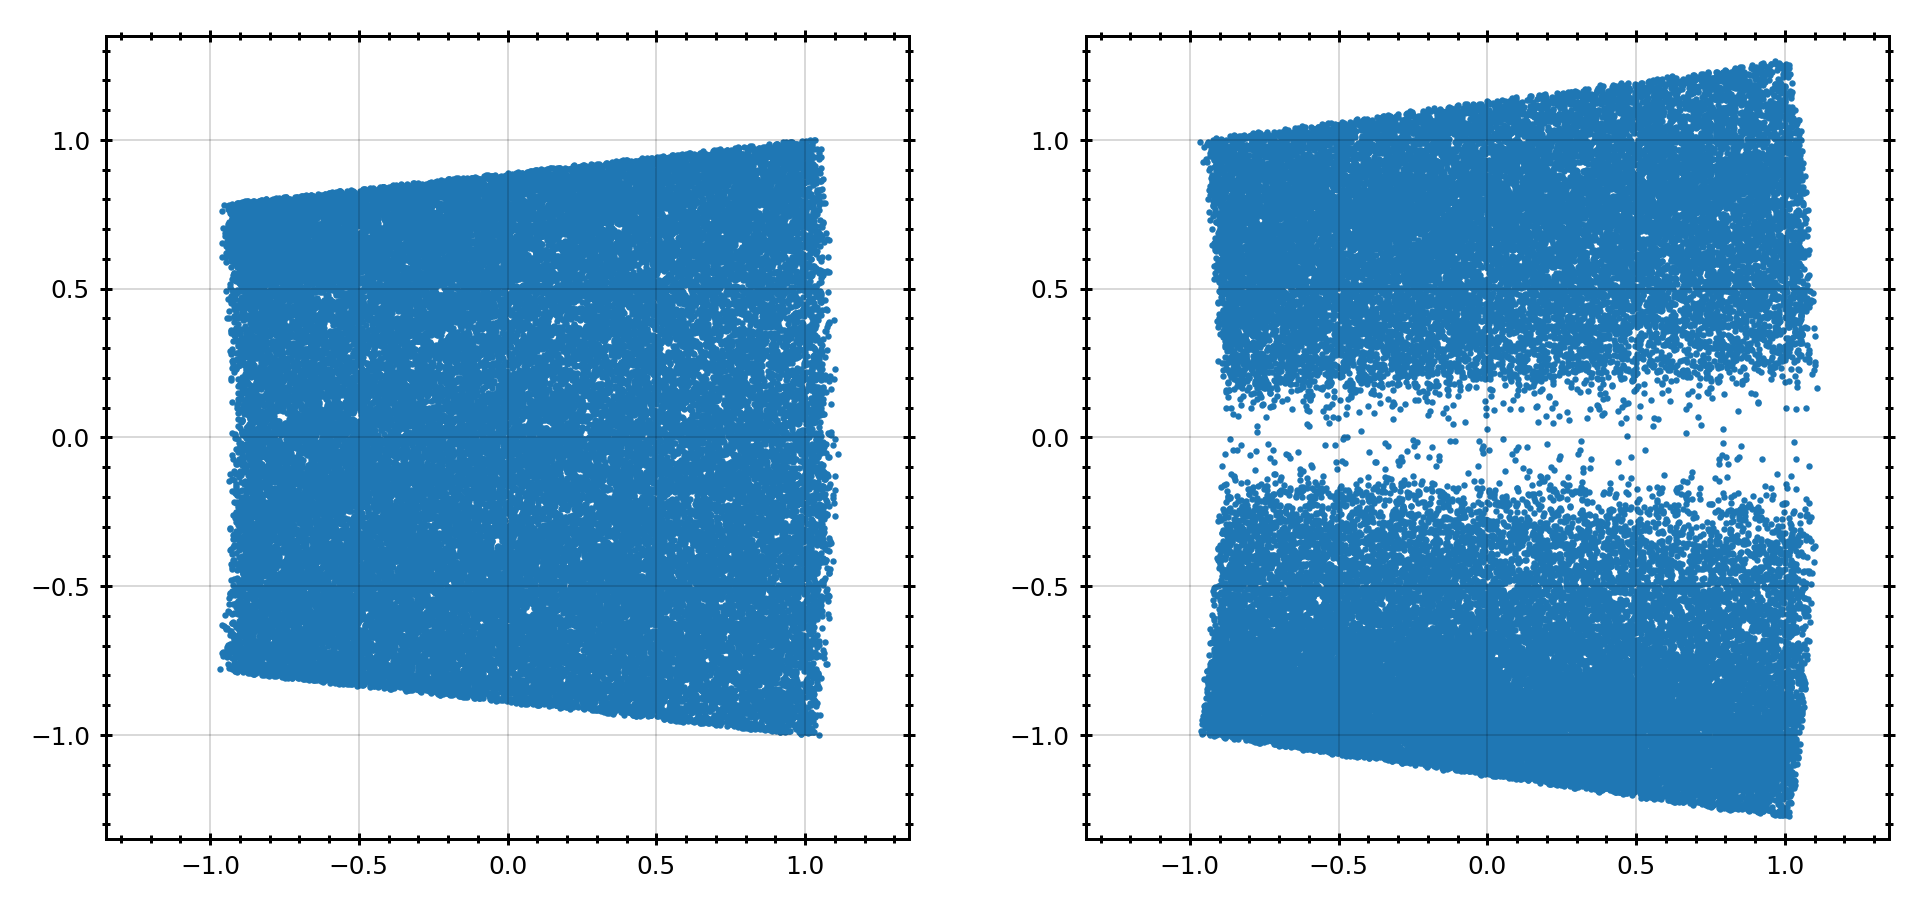

In [9]:
size, rat = 1080, 1.75
fig_w, fig_h = size*rat, size
subplots = (1, 2)
fig, axs, fs, gs = pu.initialize_figure(fig_w=fig_w, fig_h=fig_h, subplots=subplots, 
                                   ratio=None, ts=1.25, minor=True, top_bool=True, tick_direction='inout',
                                   wspace=0.1)
lim = 1.35
ss = 0.5
axs[0][0].scatter(data['x'], data['y'], 
           #c=colors_xy, cmap='gnuplot', 
           s=ss*fs, linewidths=0)


axs[0][1].scatter(data['x'], data['z'], 
            #c=colors_xz, cmap='gnuplot', 
            s=ss*fs, linewidths=0)

axs = [axs[0][0], axs[0][1]]
for ax in axs:
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_aspect('equal')

C:\Users\Pere\AppData\Local\Temp\ipykernel_1224\2006927148.py:10: RuntimeWarning: divide by zero encountered in log10
  colors = np.log10(pu.get_hist_scatter_colors(bp_rp_mag, g_abs,


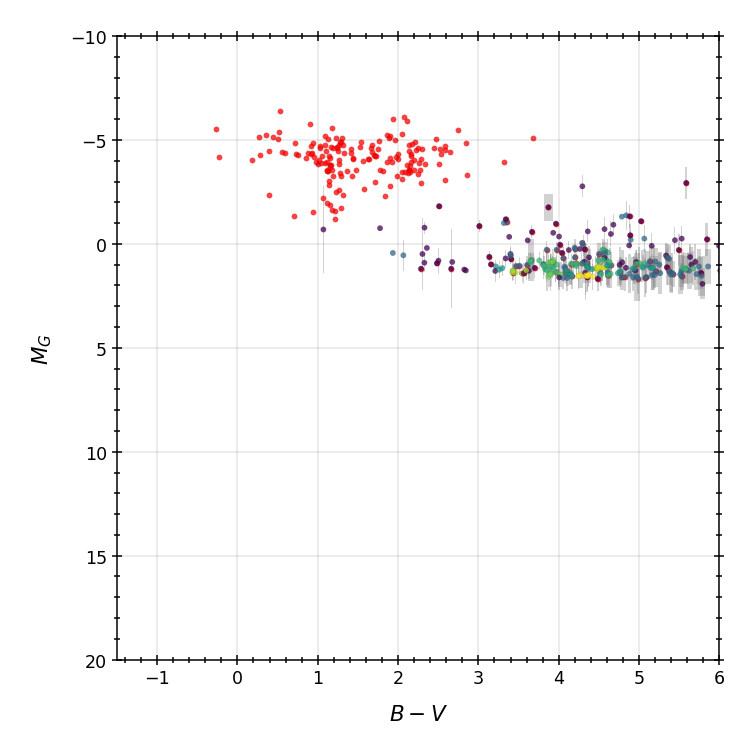

In [325]:
size, rat = 720, 1
fig_w, fig_h = size*rat, size
subplots = (1, 1)
fig, axs, fs, gs = pu.initialize_figure(fig_w=fig_w, fig_h=fig_h, subplots=subplots, 
                                   ratio=None, ts=1.75, minor=True, top_bool=True, tick_direction='inout',
                                   wspace=0.1)

ax = axs[0][0]
bp_rp_mag, g_abs = data['bp_rp_mag'], data['g_abs']
colors = np.log10(pu.get_hist_scatter_colors(bp_rp_mag, g_abs,
                x_lims=[np.min(bp_rp_mag), np.max(bp_rp_mag)],
                y_lims=[np.min(g_abs), np.max(g_abs)],
                bins=[10, 10], spherical=False))

ax.scatter(bp_rp_mag, g_abs, 
            s=0.75*fs, 
            c=colors, 
            alpha=0.75, zorder=2,
            linewidths=0.01*fs, edgecolor='k')

ax.set_xlabel(r'$B-V$', fontsize=2.15*fs)
ax.set_ylabel(r'$M_G$', fontsize=2.15*fs)


for xi, yi, x_err_i, y_err_i in zip(data['bp_rp_mag'], data['g_abs'], 
                                    data['bp_rp_mag_error'], data['g_abs_error']):
    
    #if (x_err_i > color_max_err) or (y_err_i > lum_max_err):

    rect = mpl.patches.Rectangle((xi - x_err_i/2, yi - y_err_i/2), x_err_i, y_err_i, facecolor='grey', alpha=0.35)
    ax.add_patch(rect)

ax.set_xlim(-1.5,6)
ax.set_ylim(-10, 20)

bp_rp_mag_corr = bp_rp_mag  - data['ebpminrp_gspphot'].filled(0)
g_abs_corr = g_abs - data['ag_gspphot'].filled(0)

ax.scatter(bp_rp_mag_corr, g_abs_corr, 
            s=0.75*fs, 
            #c=colors, 
            color='r',
            alpha=0.75, zorder=1,
            linewidths=0.01*fs, edgecolor='k')

ax.invert_yaxis()

Text(0, 0.5, '$V_r$ (mas/yr)')

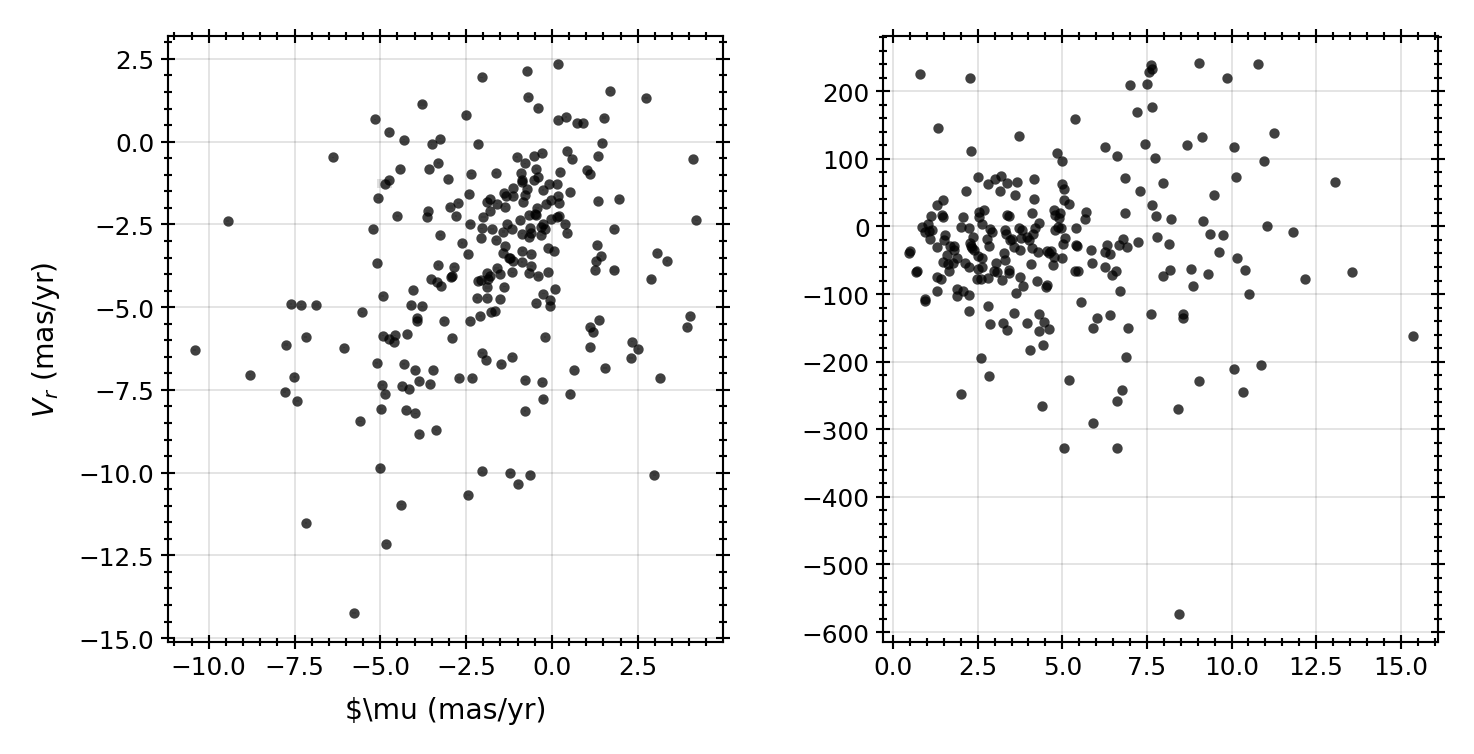

In [344]:
size, rat = 720, 2
fig_w, fig_h = size*rat, size
subplots = (1, 2)
fig, axs, fs, gs = pu.initialize_figure(fig_w=fig_w, fig_h=fig_h, subplots=subplots, 
                                   ratio=None, ts=1.75, minor=True, top_bool=True, tick_direction='inout',
                                   wspace=0.1)

ax = axs[0][0]
x, y = data['pmra'], data['pmdec']
x_err, y_err = data['pmra_error'], data['pmdec_error']
pmot_arr = np.array([x, y]).T


c = 'k'

ax.scatter(pmot_arr[:, 0], pmot_arr[:, 1], c=c, s=1.75*fs, zorder=4, 
linewidths=0.01*fs, edgecolor='k', alpha=0.75)

for xi, yi, x_err_i, y_err_i in zip(x, y, x_err, y_err):
    rect = mpl.patches.Rectangle((xi - x_err_i/2, yi - y_err_i/2), x_err_i, y_err_i, facecolor='grey', alpha=0.25)
    ax.add_patch(rect)

ax.set_xlabel(r'$\mu_{\alpha^*}$ (mas/yr)', fontsize=2*fs)
ax.set_ylabel(r'$\mu_{\delta}$ (mas/yr)', fontsize=2*fs)

ax2 = axs[0][1]

v = np.sqrt(x**2 + y**2)
v_err = np.sqrt((x_err * x/v)**2 + (y_err * x/v)**2)
rv = data['radial_velocity']
rv_err = data['radial_velocity_error']
v_arr = np.array([v, rv]).T

x_err, y_err = data['pmra_error'], data['pmdec_error']

ax2.scatter(v_arr[:, 0], v_arr[:, 1], c=c, s=1.75*fs, zorder=4, 
linewidths=0.01*fs, edgecolor='k', alpha=0.75)

ax.set_xlabel(r'$\mu (mas/yr)', fontsize=2*fs)
ax.set_ylabel(r'$V_r$ (mas/yr)', fontsize=2*fs)

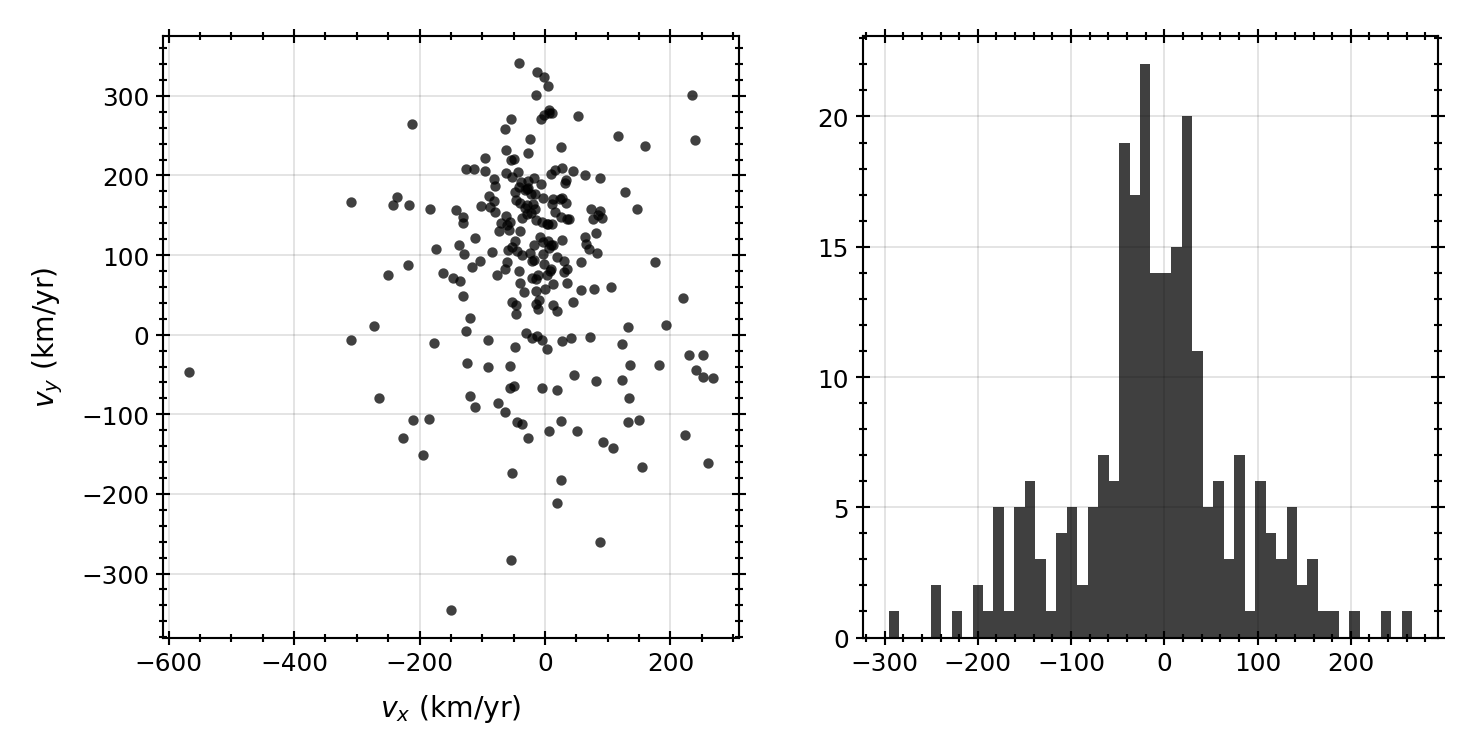

In [354]:
size, rat = 720, 2
fig_w, fig_h = size*rat, size
subplots = (1, 2)
fig, axs, fs, gs = pu.initialize_figure(fig_w=fig_w, fig_h=fig_h, subplots=subplots, 
                                   ratio=None, ts=1.75, minor=True, top_bool=True, tick_direction='inout',
                                   wspace=0.1)

ax = axs[0][0]
x, y = data['v_x'], data['v_y']
pmot_arr = np.array([x, y]).T

c = 'k'

ax.scatter(pmot_arr[:, 0], pmot_arr[:, 1], c=c, s=1.75*fs, zorder=4, 
linewidths=0.01*fs, edgecolor='k', alpha=0.75)


ax.set_xlabel(r'$v_x$ (km/yr)', fontsize=2*fs)
ax.set_ylabel(r'$v_y$ (km/yr)', fontsize=2*fs)

ax2 = axs[0][1]

z = data['v_z']

# histogram of vz
ax2.hist(z, bins=50, color='k', alpha=0.75, linewidth=1.5*fs)

a=1